<a href="https://colab.research.google.com/github/juliocesarortiz/DataScience/blob/main/supervisado_dsai_ss1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diplomado de Ciencia de Datos
## Módulo de Aprendizaje Automático
### Tema de Métodos Supervisados (Sesión 1)

In [ ]:
# importar la biblioteca para análisis de datos
import numpy as np
# importar la biblioteca para graficación
import matplotlib.pyplot as plt
# importar la biblioteca para manipulación y tratamiento de datos
import pandas as pd

In [ ]:
# leer el conjunto de datos de ciudades de Canadá y Estados Unidos
cities_df = pd.read_csv("canada_usa_cities.csv")
cities_df.head()

,longitude,latitude,country
0,-130.0437,55.9773,USA
1,-134.4197,58.3019,USA
2,-123.0780,48.9854,USA
3,-122.7436,48.9881,USA
4,-122.2691,48.9951,USA


In [ ]:
# obtener la información del dataset
cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   longitude  209 non-null    float64
 1   latitude   209 non-null    float64
 2   country    209 non-null    object 
dtypes: float64(2), object(1)
memory usage: 5.0+ KB


In [ ]:
# Convierte datos string en numéricos introduciendo variables dummy
# para la etiqueta de salida
cities_df = pd.get_dummies(cities_df,columns=['country'], drop_first=True)
cities_df.rename(columns={"country_USA": "country"}, inplace=True)

# muestra las primeras 5 líneas del dataframe resultante
cities_df.head()

,longitude,latitude,country
0,-130.0437,55.9773,1
1,-134.4197,58.3019,1
2,-123.0780,48.9854,1
3,-122.7436,48.9881,1
4,-122.2691,48.9951,1


In [ ]:
# dividir el conjunto de datos en los conjuntos de entrenamiento(60%), validación (20%) y prueba (20%)
from sklearn.model_selection import train_test_split

train_val_df, test_df = train_test_split(cities_df, test_size=0.2, random_state=23)
train_df, validation_df = train_test_split(train_val_df, test_size=0.25, random_state=23)

print("conjunto de entrenamiento =", train_df.shape)
print("conjunto de validación =", validation_df.shape)
print("conjunto de prueba =", test_df.shape)

conjunto de entrenamiento = (125, 3)
conjunto de validación = (42, 3)
conjunto de prueba = (42, 3)


In [ ]:
# Separar las variables independientes (características de las ciudades)
# de la variable dependiente (país a la que pertenece)
X_train, y_train = train_df.drop(columns=["country"], axis=1), train_df["country"]
X_valid, y_valid = validation_df.drop(columns=["country"], axis=1), validation_df["country"]
X_test, y_test = test_df.drop(columns=["country"], axis=1), test_df["country"]
X_train.head()

,longitude,latitude
153,-71.1753,46.7910
125,-63.5859,44.6486
65,-111.8315,33.4151
40,-121.8906,37.3362
95,-79.0546,43.1642


## Árboles de Decisión

In [ ]:
# crea, entrena y evalua un árbol de decisión con una profundidad máxima de 1
from sklearn.tree import DecisionTreeClassifier

dtc1 = DecisionTreeClassifier(max_depth=1)
dtc1.fit(X_train, y_train)
print("Exactitud de entrenamiento=",dtc1.score(X_train, y_train))
print("Exactitud de validación=",dtc1.score(X_valid, y_valid))

Exactitud de entrenamiento= 0.816
Exactitud de validación= 0.8333333333333334


In [ ]:
# crea, entrena y evalua un árbol de decisión con una profundidad máxima de 3
dtc2 = DecisionTreeClassifier(max_depth=3)
dtc2.fit(X_train, y_train)
print("Exactitud de entrenamiento=",dtc2.score(X_train, y_train))
print("Exactitud de validación=",dtc2.score(X_valid, y_valid))

Exactitud de entrenamiento= 0.872
Exactitud de validación= 0.8571428571428571


In [ ]:
# crea, entrena y evalua un árbol de decisión con una profundidad máxima de 7
dtc3 = DecisionTreeClassifier(max_depth=7)
dtc3.fit(X_train, y_train)
print("Exactitud de entrenamiento=",dtc3.score(X_train, y_train))
print("Exactitud de validación=",dtc3.score(X_valid, y_valid))

Exactitud de entrenamiento= 1.0
Exactitud de validación= 0.8095238095238095


In [ ]:
# selecciona y evalua el mejor árbol de decisión
dtc_model = dtc2
dtc_model.score(X_test, y_test)

0.8571428571428571

[Text(0.375, 0.875, 'latitude <= 42.096\ngini = 0.473\nsamples = 125\nvalue = [77, 48]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 25\nvalue = [0, 25]'),
 Text(0.5, 0.625, 'longitude <= -82.424\ngini = 0.354\nsamples = 100\nvalue = [77, 23]'),
 Text(0.25, 0.375, 'latitude <= 49.0\ngini = 0.467\nsamples = 43\nvalue = [27, 16]'),
 Text(0.125, 0.125, 'gini = 0.444\nsamples = 21\nvalue = [7, 14]'),
 Text(0.375, 0.125, 'gini = 0.165\nsamples = 22\nvalue = [20, 2]'),
 Text(0.75, 0.375, 'longitude <= -69.246\ngini = 0.215\nsamples = 57\nvalue = [50, 7]'),
 Text(0.625, 0.125, 'gini = 0.085\nsamples = 45\nvalue = [43, 2]'),
 Text(0.875, 0.125, 'gini = 0.486\nsamples = 12\nvalue = [7, 5]')]

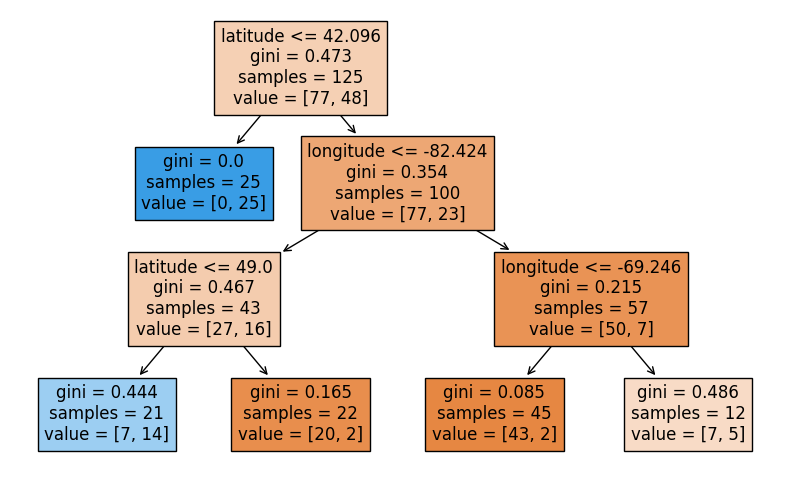

In [ ]:
# grafica el árbol de decision con profundidad máxima de 3
from sklearn.tree import plot_tree

plot_tree(dtc_model, feature_names=dtc_model.feature_names_in_, filled=True,
          ax=plt.subplots(figsize=(10, 6))[1])

## Bosques Aleatorios

In [ ]:
# crea, entrena y evalua un bosque aleatorio con 1 árbol con profundidad
# máxima de 3
from sklearn.ensemble import RandomForestClassifier

rfc1 = RandomForestClassifier(n_estimators=1, max_depth=3)
rfc1.fit(X_train, y_train)
print("Exactitud de entrenamiento=",rfc1.score(X_train, y_train))
print("Exactitud de validación=",rfc1.score(X_valid, y_valid))

Exactitud de entrenamiento= 0.856
Exactitud de validación= 0.8333333333333334


In [ ]:
# crea, entrena y evalua un bosque aleatorio con 20 árboles con profundidad
# máxima de 3
rfc2 = RandomForestClassifier(n_estimators=10, max_depth=3)
rfc2.fit(X_train, y_train)
print("Exactitud de entrenamiento=",rfc2.score(X_train, y_train))
print("Exactitud de validación=",rfc2.score(X_valid, y_valid))

Exactitud de entrenamiento= 0.888
Exactitud de validación= 0.8809523809523809


In [ ]:
# crea, entrena y evalua un bosque aleatorio con 40 árboles con profundidad
# máxima de 3
rfc3 = RandomForestClassifier(n_estimators=40, max_depth=3)
rfc3.fit(X_train, y_train)
print("Exactitud de entrenamiento=",rfc3.score(X_train, y_train))
print("Exactitud de validación=",rfc3.score(X_valid, y_valid))

Exactitud de entrenamiento= 0.888
Exactitud de validación= 0.8571428571428571


In [ ]:
# selecciona y evalua el mejor árbol de decisión
rfc_model = rfc3
rfc_model.score(X_test, y_test)

0.8333333333333334

## Regresión Logística

In [ ]:
# crea, entrena y evalua un modelo de regresión logística con hiperparámetros por omisión
from sklearn.linear_model import LogisticRegression

lrc_model = LogisticRegression()
lrc_model.fit(X_train, y_train)
print("Exactitud de entrenamiento=",lrc_model.score(X_train, y_train))
print("Exactitud de validación=",lrc_model.score(X_valid, y_valid))

Exactitud de entrenamiento= 0.824
Exactitud de validación= 0.8333333333333334


## Bayes Ingenuo Gaussiano

In [ ]:
# crea, entrena y evalua un modelo de Bayes Ingenuo Gaussiano con hiperparámetros por omisión
from sklearn.naive_bayes import GaussianNB

gnbc_model = GaussianNB()
gnbc_model.fit(X_train, y_train)
print("Exactitud de entrenamiento=",gnbc_model.score(X_train, y_train))
print("Exactitud de validación=",gnbc_model.score(X_valid, y_valid))

Exactitud de entrenamiento= 0.8
Exactitud de validación= 0.8333333333333334


## Máquina de Vectores de Soporte

In [ ]:
# crea, entrena y evalua una máquina de vectores de soporte con hiperparámetros por omisión
from sklearn.svm import SVC

svmc_model = SVC()
svmc_model.fit(X_train, y_train)
print("Exactitud de entrenamiento=",svmc_model.score(X_train, y_train))
print("Exactitud de validación=",svmc_model.score(X_valid, y_valid))

Exactitud de entrenamiento= 0.616
Exactitud de validación= 0.6904761904761905


### Matriz de confusión y métricas de evaluación

[[21  1]
 [ 6 14]]


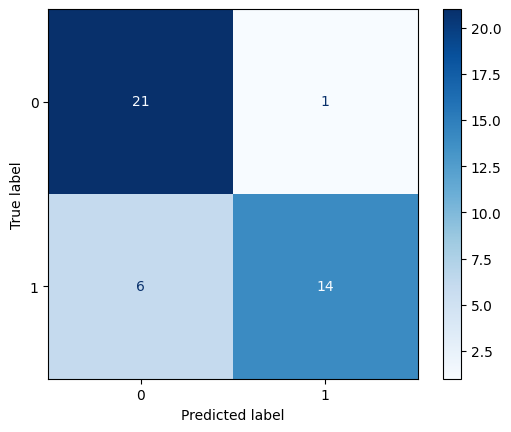

In [ ]:
# obten la matriz de confusión del mejor bosque aleatorio
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pred = rfc_model.predict(X_test)
cm = confusion_matrix(y_test, pred)
print(cm)

ConfusionMatrixDisplay.from_estimator(
    rfc_model, X_test, y_test,
    display_labels=rfc_model.classes_,
    cmap=plt.cm.Blues
)

In [ ]:
# calcula las métricas de evaluación del bosque aleatorio
VN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
VP = cm[1,1]

Exactitud = (VP + VN) / (VP + VN + FP + FN)
Precision = VP / (VP + FP)
Recall = VP / (VP + FN)
F1 = 2*VP / (2*VP + FP + FN )

print('Exactitud: ', Exactitud )
print('Precision: ', Precision)
print('Recall: ', Recall)
print('F1-score: ', F1)

Exactitud:  0.8333333333333334
Precision:  0.9333333333333333
Recall:  0.7
F1-score:  0.8


In [ ]:
# obten el reporte de clasificación del árbol de decisión
from sklearn.metrics import classification_report

print(
    classification_report(
        y_test,
        rfc_model.predict(X_test),
        target_names=["Canada", "USA"]
    )
)

              precision    recall  f1-score   support

      Canada       0.78      0.95      0.86        22
         USA       0.93      0.70      0.80        20

    accuracy                           0.83        42
   macro avg       0.86      0.83      0.83        42
weighted avg       0.85      0.83      0.83        42



[[19  3]
 [ 7 13]]


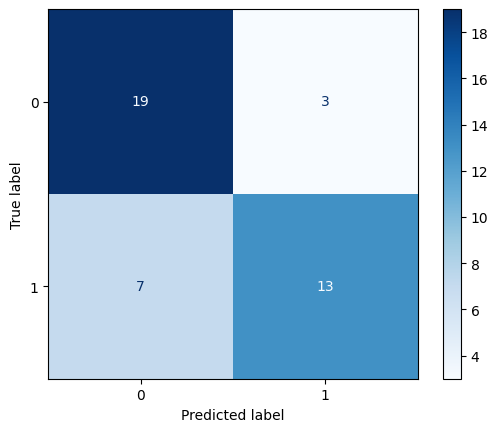

In [ ]:
# obten la matriz de confusión del modelo de Bayes Ingenuo Gaussiano
pred = gnbc_model.predict(X_test)
cm = confusion_matrix(y_test, pred)
print(cm)

ConfusionMatrixDisplay.from_estimator(
    gnbc_model, X_test, y_test,
    display_labels=gnbc_model.classes_,
    cmap=plt.cm.Blues
)

In [ ]:
# obten el reporte de clasificación del modelo Bayes Ingenuo Gaussiano
from sklearn.metrics import classification_report

print(
    classification_report(
        y_test,
        gnbc_model.predict(X_test),
        target_names=["Canada", "USA"]
    )
)

              precision    recall  f1-score   support

      Canada       0.73      0.86      0.79        22
         USA       0.81      0.65      0.72        20

    accuracy                           0.76        42
   macro avg       0.77      0.76      0.76        42
weighted avg       0.77      0.76      0.76        42



## Curvas ROC y Áreas bajo las curvas

<Figure size 640x480 with 0 Axes>

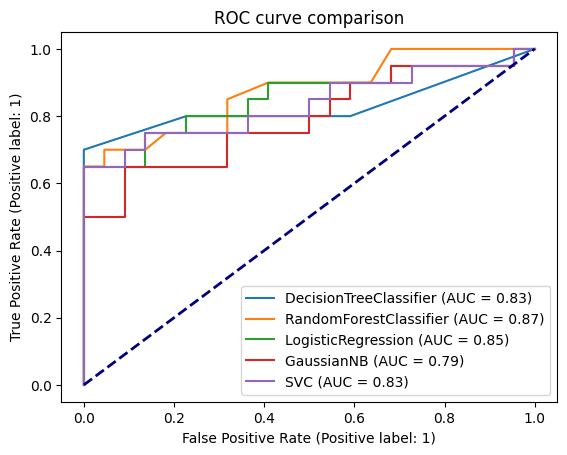

In [ ]:
# calcular y mostrar las curvas ROC de cada modelo de aprendizaje
# y sus métricas de área bajo la curva (AUC)
from sklearn.metrics import RocCurveDisplay

plt.figure()
lw = 2
disp = RocCurveDisplay.from_estimator(dtc_model, X_test, y_test)
RocCurveDisplay.from_estimator(rfc_model, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(lrc_model, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(gnbc_model, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(svmc_model, X_test, y_test, ax=disp.ax_)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.title("ROC curve comparison")
plt.legend(loc="lower right")
plt.show()

##Conclusión: El **Bosque Aleatorio** el mejor modelo con un AUC de 0.87.